# Particle Filters

Particle filters are a version of thompson sampling that allow us to approximate the probability distribution of different parameters. This is often seen in the world of pricing inventory. It is most useful for pricing individual items that sell one at a time; however, it is highly flexible and can be used to model many different problems.

We will be focusing on stocks and mean reversion, meaning we are going to model the "true" value of a stock using a particle filter and Thompson Sampling. We will also see how this can be used to inform a trading strategy.

*******

Imagine being god of the stock market for a moment. Being gods, we know the stock of company LRW is actually worth \\$45, its average or so called "true" value. Currently, the stock is priced at \\$40.  The market value of this stock tends to fluctuate around the actual value, as stocks do. Sometimes the price creeps up and sometimes it creeps down, but eventually it will revert to this average (which we call 'mean reversion').

The investors of the stock market are not privy to this information. Therefore, to them the true of LRW stock is a random variable (this is a Bayesian concept and one that is very useful for time series problems). For now, we will assume that the "true" value of LRW does not change over time.

Starting with this initial value, the investors can begin to form a prior for the mean or true value of this stock. However, they do not want to assume too much since we have no information about whether this is above or below the mean. Say they choose a relatively naive prior. Perhaps we will start with a normally distributed variable with a standard deviation of 5: $$ V_{LRW} \sim \text{Normal}(40, 5) $$

For this example, the particle filter will take on the role of the prior and posterior distributions for mu. Then using Thompson Sampling, we can estimate the probability that the market value of LRW is above or below the true value of the mean and use this to inform our decision to trade or not. This problem is slightly different from the Multi-Armed Bandit in that we are not required to take an action in order to learn more about the environment. However, it *can* be used for explore-exploit strategies when trading low-volume inventory or when you have enough influence in the market to affect prices. For now, we will assume the point of view of the ordinary investor.

A particle filter is a discrete representation of our prior and posterior, so to do this we take our continuous prior and select some range of possible values for $V$. Although LRW is not particularly volatile, let's set this range to \\$20 all the way to \\$60.

In [1]:
import numpy as np
from scipy.stats import norm

V = np.arange(20, 60.1, .25)
P_V = norm.pdf(V, loc=40., scale=5)
P_V = P_V / P_V.sum() # So that altogether it equals 1

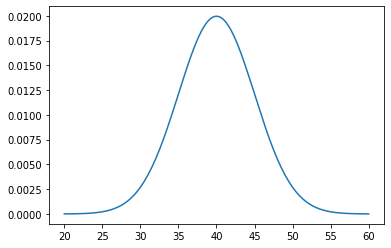

In [2]:
import matplotlib.pyplot as plt
plt.plot(V, P_V)
plt.show()

For convenience, let's say that the true variance of the stock price $SP_{LRW} = 5$ so that at any given time the actual curve looks like this:

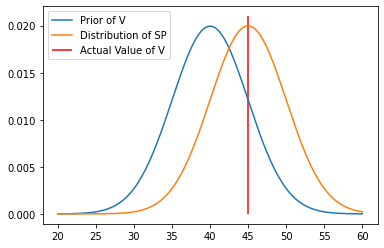

In [4]:
plt.plot(V, P_V)
P_SP = norm.pdf(V, loc=45, scale=5)
P_SP = P_SP / P_SP.sum()
plt.plot(V, P_SP)
plt.vlines(45, 0, .021, color='red')
plt.legend(['Prior of V', 'Distribution of SP', 'Actual Value of V'])
plt.show()

Notice that the value we are trying to estimate is not the same as the prices we observe. What we see is simply the market price $SP_{LRW}$. The actual value of $V_{LRW}$ is unknown. So while our prior and posterior is based on the distribution of $V_{LRW}$, it will be modified by a Gaussian/Normal distribution based on the variable $SP_{LRW}$. Perhaps this will also explain why, in the previous Mulit-Armed Bandit problem, we had two different distributions: A binomial/Bernoulli distribution for the likelihood function and a Beta distribution for the prior/posterior. The parameter $p$ from the binomial distribution is the parameter we were trying to estimate and the $\alpha$ and $\beta$ from the Beta distribution were *hyper*parameters meant to help estimate $p$.

In this example, we do not tune any parameters in truth. Because it is discrete, the particle filter can take the shape of any probability distribution, so no hyperparameters. We could use it to estimate both mean and variance of the orange curve, but to keep things 1-dimensional, we will simply try to find the red line, or the mean of the orange curve.

*******

So let's get started!

Going back to Bayes' Rule:

$$ \text{Posterior } \propto \text{ Likelihood } \cdot \text{ Prior} $$

The prior and posterior are both represented by the particle filter, so the only thing we need to worry about is the likelihood function $P(sp|V_{LRW})$, or the probability of observing a stock price given a true value for LRW. It's kind of like drawing a probability distribution in reverse.

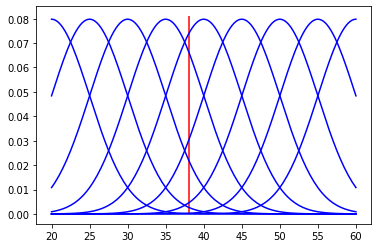

In [5]:
sp = 38.

# The probability of seeing a value of 38 given different values of V
for V_test in range(20, 61, 5):
    y = norm.pdf(V, loc=V_test, scale=5)
    plt.plot(V, y, color='blue')
plt.vlines(sp,0,.081,color='red')

In [6]:
L = lambda sp: norm.pdf(sp, loc=V, scale=5)

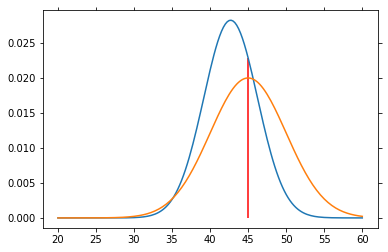

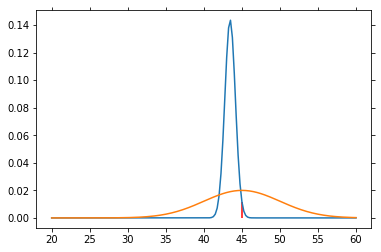

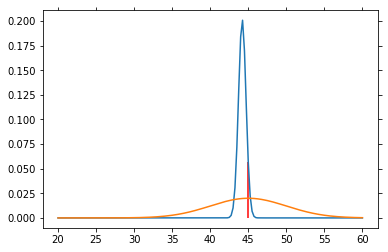

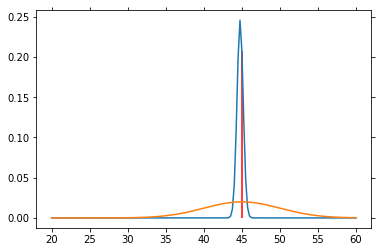

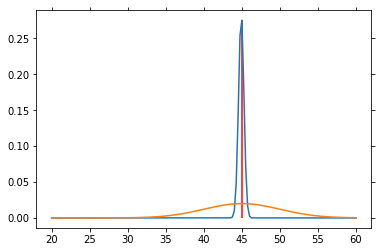

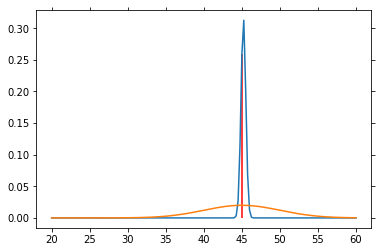

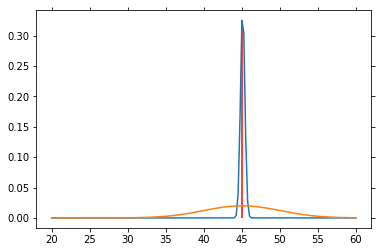

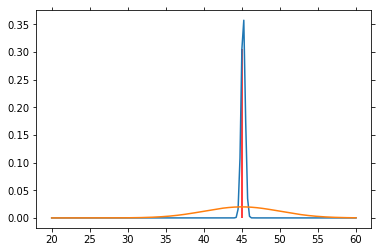

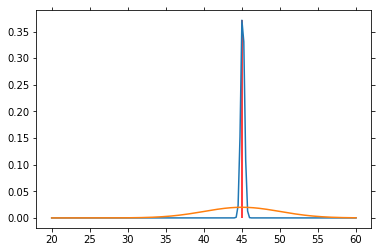

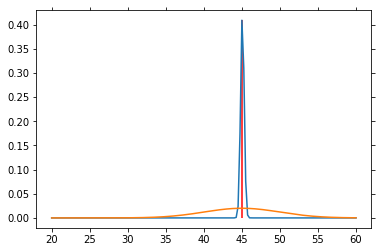

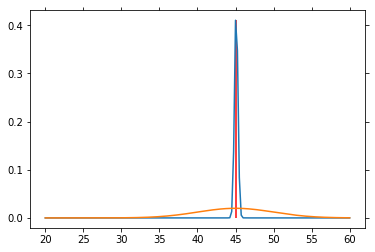

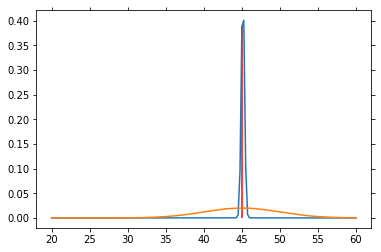

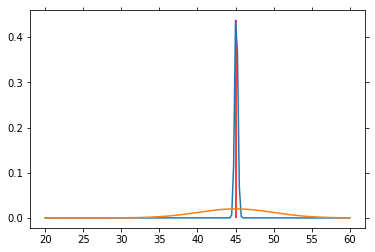

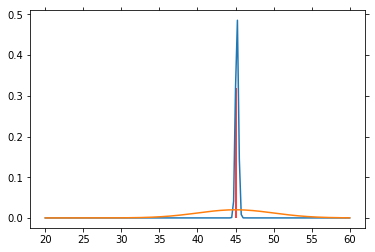

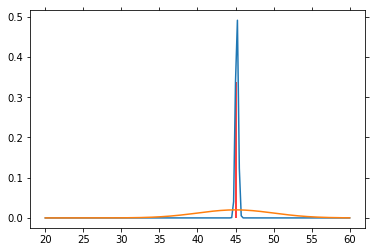

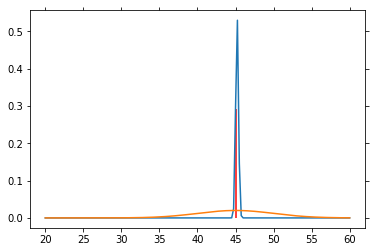

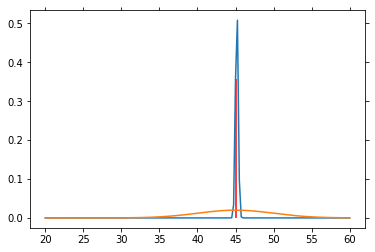

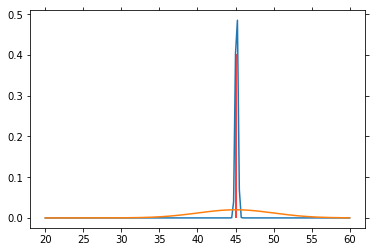

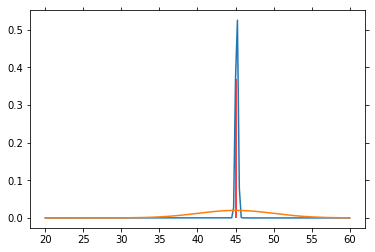

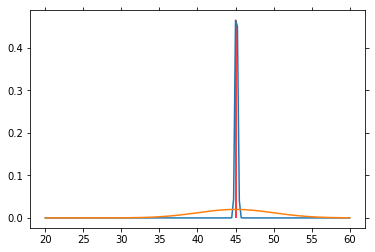

In [18]:
# Particle filter simulation
V = np.arange(20, 60.1, .25)
P_V = norm.pdf(V, loc=40., scale=5)
P_V = P_V / P_V.sum() # So that altogether it equals 1

P_SP = norm.pdf(V, loc=45, scale=5)
P_SP = P_SP / P_SP.sum()

for n in range(1000):
    
    sp = norm.rvs(loc=45, scale=5)
    P_V = L(sp) * P_V
    P_V = P_V / P_V.sum()
    
    if n % 50 == 0:
        plt.plot(V, P_V)
        plt.plot(V, P_SP)
        plt.vlines(45, 0, P_V[25*4], color='red')
        plt.draw()

(43.0, 47.0)

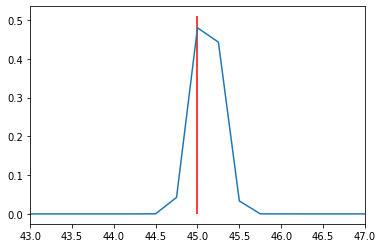

In [20]:
plt.plot(V, P_V)
plt.vlines(45, 0, .51, color='red')
plt.xlim(43, 47)